## 1. Significant earthquakes since 2150 B.C.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read earthquakes-2021-10-24_21-24-20_+0800.tsv as Sig_Eqs
Sig_Eqs = pd.read_table('earthquakes-2021-10-24_21-24-20_+0800.tsv',sep='\t') #I get inspired from https://blog.csdn.net/qq_18351157/article/details/104749945

#Verify all columns are included
print(Sig_Eqs.shape)
Len = len(Sig_Eqs) # 获取下载的原始数据的长度

(6273, 48)


#### 1.1 Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

In [3]:
#Sig_Eqs.head() #Preview the data,发现序号为0行是空行，决定去除
if len(Sig_Eqs) == Len: #下载的原始数据包括一列空行，和6272个记录的数据，此条件防止第二次启动本cell时误删掉需要的数据
    Sig_Eqs = Sig_Eqs.drop(index=[0]) #去除第0行空行
    Sig_Eqs.reset_index(drop=True, inplace=True)

In [4]:
Sig_Eqs.head(10000)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6268,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6269,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6270,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [5]:
#Compute the total number of deaths since 2150 B.C in each country
Total_death_number_each_country = Sig_Eqs.groupby('Country')['Total Deaths'].sum()

#Get the top ten countries along with the total number of deaths
Top_ten_total_death_number_country = Total_death_number_each_country.sort_values(ascending=False)[:10]

# Print the required result
print(Top_ten_total_death_number_country)

Country
CHINA         2041784.0
TURKEY         867454.0
IRAN           758638.0
SYRIA          437700.0
ITALY          359064.0
JAPAN          355137.0
HAITI          323770.0
AZERBAIJAN     310119.0
INDONESIA      280351.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


#### 1.2 Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2017.0    32
 2018.0    28
 2019.0    27
 2020.0    15
 2021.0    18
Name: Year, Length: 530, dtype: int64


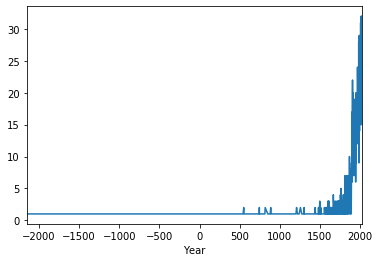

In [6]:
# Compute the total number of earthquakes with magnitude larger than 6.0
Total_mag_largethan_6_earthquakes_number_each_year = Sig_Eqs[Sig_Eqs['Mag'] > 6.0].groupby('Year')['Year'].count()
print(Total_mag_largethan_6_earthquakes_number_each_year) # 打印结果

#绘制结果
Total_mag_largethan_6_earthquakes_number_each_year.plot()

#通过图中可以看出全球地震震级大于6级以上的地震总次数呈现一个先总体不变，然后在1500年左右开始显著上升的趋势，尤其近百年来的次数显著大于过去。
#我猜测这种现象出现的一个主要原因是随着时间的推进监测地震的技术手段的提升，古代的数据可能只有造成重大影响的地震才有可能被记录下来，因此存在数据缺失等问题。

#### 1.3 Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [9]:
def CountEq_LargestEq(Sig_Eqs, Country):
    CountEq = Sig_Eqs.groupby('Country')['Year'].count()[Country]#Get the total number of earthquakes since 2150 B.C. in a given country 
    LargestEq = Sig_Eqs.groupby('Country')['Mag'].max()[Country] #Get the Largest earthquake's magitude since 2150 B.C. in a given country 
    Sig2 = Sig_Eqs[(Sig_Eqs['Mag']==LargestEq) & (Sig_Eqs['Country']==Country)] #得到一个存放了指定Country的最大地震级数的sub-dataframe
    
    #将年月日转换成int
    Sig2['bYear'] = Sig2['Year'].astype(int)
    Sig2['bMo'] = Sig2['Mo'].astype(int)
    Sig2['bDy'] = Sig2['Dy'].astype(int)
    
    #将年月日转换成str
    Sig2['cYear'] = Sig2['bYear'].astype(str)
    Sig2['cMo'] = Sig2['bMo'].astype(str)
    Sig2['cDy'] = Sig2['bDy'].astype(str)
    
    #将个位数的月日前面加上0,参考自老师的Lab03中的做法
    Sig2['cMo'][Sig2['bMo']<10] = '0' + Sig2['bMo'].astype(str)
    Sig2['cDy'][Sig2['bDy']<10] = '0' + Sig2['bDy'].astype(str)
    
    #将Str格式的日期存储在Sig2的新列'Date'中
    Sig2['Date'] = Sig2['cYear']+'-'+Sig2['cMo']+'-'+Sig2['cDy']
    Sig2 = Sig2.set_index(Sig2['Date']+' in '+Country) #将日期+in 国家存为index
    Sig2['CountEq'] =  CountEq #将CountEq（指定国家发生地震的次数）作为一列存储在Sig2中
    return Sig2['CountEq'] #返回带有日期+in 国家的index的只包含CountEq（指定国家发生地震的次数）列的子series

In [7]:
Sig3 = Sig_Eqs.fillna(0) #创建一个新的dataframe也就是Sig3,对缺失值进行处理后输入进函数中处理，将缺失值的地方填入0值
Sig3['Country'][Sig3['Country'] == 0] = 'NAN' #在国家名字缺失的地方变成字符串‘NAN’，以上两种处理缺失值的办法都是为了防止错误发生
Sig3.head(10000) #预览Sig3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,0,-2150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JORDAN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SYRIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TURKMENISTAN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,-1610.0,0.0,0.0,0.0,0.0,0.0,3.0,1351.0,GREECE,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0,-1566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ISRAEL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,0,2021.0,9.0,21.0,23.0,15.0,53.0,0.0,0.0,AUSTRALIA,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,46.0,1.0
6268,0,2021.0,9.0,27.0,6.0,17.0,22.0,0.0,0.0,GREECE,...,0.0,0.0,20.0,1.0,0.0,3.0,772.0,3.0,0.0,0.0
6269,0,2021.0,10.0,6.0,22.0,1.0,8.0,0.0,0.0,PAKISTAN,...,0.0,0.0,229.0,3.0,0.0,2.0,0.0,3.0,0.0,2.0
6270,0,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,0.0,NAN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
Country_list = Sig3['Country'].unique() #创建一个只包含国家的列表

Total_number = []#创建一个空列表存储调用CountEq_LargestEq(Sig_Eqs, Country)得到的每个国家发生地震的次数
L = []#创建一个二维空列表存储调用CountEq_LargestEq(Sig_Eqs, Country)得到的每个国家地震的次数（用index存储的），以及返回的带有日期的index
L_invert=[]
for i in range(len(Country_list)):
    print(i)#由于函数运行的比较慢，输出i表示程序的运行情况
    Total_number.append(CountEq_LargestEq(Sig3, Country_list[i])[0])#存储每个国家发生地震的次数
    L0 = CountEq_LargestEq(Sig3, Country_list[i]).index.tolist()#L0每次存储返回的index，为一个列表
    L.append(L0)#将L0存入二维列表L中
    L[i].append(Total_number[i])#将获得的每个国家发生的地震次数存储进L0的index为1的位置
    L_invert.append(L[i])
    L_invert[i][0] = L[i][-1]
    L_invert[i][1] = L[i][0]
print(L_invert)

0
1
2
3


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
[[5, 5], [33, 33], [11, 11], [269, 269, 269], [23, 23, '1546-01-14 in ISRAEL', 23], [326, 326], [14, 14], [380, 380], [99, 99], [330, 330], [14, 14], [27, 27], [15, 15], [26, 26, '1761-03-30 in PORTUGAL', 26], [610, 610], [150, 150], [56, 56], [18, 18], [15, 15], [6, 6], [53, 53], [20, 20, '1700-09-12 in SOUTH KOREA', 20], [59, 59], [12, 12], [9, 9], [16, 16, 16], [4, 4], [43, 43], [10, 10], [6, 6], [22, 22], [24, 24], [409, 409], [13, 13], [13, 13], [14, 14, '1984-03-19 in UZBEKISTAN'

In [42]:
S = pd.DataFrame(L_invert,columns=['Total_number','Totoal_number','II','III'],dtype=int)

S.head(200)

,Total_number,Totoal_number,II,III
0,5,5,None,NaN
1,33,33,None,NaN
2,11,11,None,NaN
3,269,269,269,NaN
4,23,23,1546-01-14 in ISRAEL,23.0
...,...,...,...,...
152,1,1,None,NaN
153,1,1,None,NaN
154,1,1,None,NaN
155,1,1,None,NaN
